## World immigration data analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install country_converter
import country_converter as coco
import plotly
import plotly.plotly as py
from IPython.display import IFrame 
from numpy.polynomial.polynomial import polyfit
import math

In [3]:
#sign in plotly
py.sign_in("cicichen0407", "98pykyEpf5d2TtDiOaqN")
# set all the data to 4 decimal
pd.set_option("display.float.format", lambda x: "%.4f" % x) 

### Overview of world immigration 

In [229]:
#import immigrant stock dataset, reset the index
migrant_stock = pd.read_excel("migrant stock.xlsx", sheet_name="migrant_stock", header=1).reset_index()
migrant_stock.head()

,level_0,level_1,level_2,level_3,level_4,1990,1995,2000,2005,2010,...,2010.1,2015.1,2017.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2,2017.2
0,14,Burundi,nan,108,B R,333110,254853,125628,172874,235259,...,115823,142790,147599,169843,130688,64534,88069,119436,147020,151970
1,15,Comoros,nan,174,B,14079,13939,13799,13209,12618,...,6060,6071,6071,7362,7325,7288,6923,6558,6484,6484
2,16,Djibouti,nan,262,B R,122221,99774,100507,92091,101575,...,53295,59081,61025,57979,47298,47587,40776,48280,53270,55064
3,17,Eritrea,nan,232,I,11848,12400,12952,14314,15676,...,8603,8833,8889,5620,5858,6096,6585,7073,7108,7152
4,18,Ethiopia,nan,231,B R,1155390,806904,611384,514242,567720,...,297534,591876,624222,548106,382787,289165,244517,270186,570700,602921


In [230]:
#set year list
year = [1990, 1995, 2000, 2005, 2010, 2015, 2017]
#replace the column name and set "Country" as index
migrant_stock.rename(columns={"level_1": "Country"},inplace=True)
migrant_stock = migrant_stock.set_index("Country")
#replace missing value by 0
migrant_stock.replace("..", "0", inplace=True)
migrant_stock = migrant_stock.fillna("0")
#select relevant data, change the data type to float
migrant_stock = migrant_stock[year].astype(dtype="float64")
migrant_stock = migrant_stock/1000
migrant_stock.head()

,1990,1995,2000,2005,2010,2015,2017
Country,,,,,,,
Burundi,333.1100,254.8530,125.6280,172.8740,235.2590,289.8100,299.5690
Comoros,14.0790,13.9390,13.7990,13.2090,12.6180,12.5550,12.5550
Djibouti,122.2210,99.7740,100.5070,92.0910,101.5750,112.3510,116.0890
Eritrea,11.8480,12.4000,12.9520,14.3140,15.6760,15.9410,16.0410
Ethiopia,1155.3900,806.9040,611.3840,514.2420,567.7200,1162.5760,1227.1430


In [231]:
#check the lengths of the dataset
len(migrant_stock.index)

232

In [232]:
#define a function to add ISO3 code to each country
def add_country_code(df):
    #convert country name to country code
    code = coco.convert(names=list(df.index), to="ISO3")
    df["Code"] = code
    #can not find the channel islands ISO3 code so remove it.
    df=df[df.Code != "not found"]
    return df

In [234]:
migrant_stock_clean = add_country_code(migrant_stock)
migrant_stock_clean.head()

,1990,1995,2000,2005,2010,2015,2017,Code
Country,,,,,,,,
Burundi,333.1100,254.8530,125.6280,172.8740,235.2590,289.8100,299.5690,BDI
Comoros,14.0790,13.9390,13.7990,13.2090,12.6180,12.5550,12.5550,COM
Djibouti,122.2210,99.7740,100.5070,92.0910,101.5750,112.3510,116.0890,DJI
Eritrea,11.8480,12.4000,12.9520,14.3140,15.6760,15.9410,16.0410,ERI
Ethiopia,1155.3900,806.9040,611.3840,514.2420,567.7200,1162.5760,1227.1430,ETH


In [9]:
#for a given year, map the immigration stock over the world using plotly   
def mapper(year, df):
    data = [dict(type = "choropleth",
                 autocolorscale = True,
                 locations = df["Code"],
                 z = df[year],
                 text = df.index,
                 hoverinfo="text+z",
                 marker=dict(line=dict(color="rgb(128,128,128)", width=0.5)),
                 colorbar=dict(title="number of people(southand)" + str(year)))]
    
    layout = dict(title="World immigrant stock in" + str(year),
                  geo = dict(showcoastlines=False, showframe=False, projection={"type": "Mercator"}))
    
    fig = dict(data=data, layout=layout)
    #plotly.offline.plot(data, filename=str(year)+"world.html")                  
    return py.iplot(fig, validate=False, filename="geomap-world_mirgrant")

In [273]:
mapper(1990,migrant_stock_clean)

In [274]:
mapper(2017,migrant_stock_clean)

### world immigration by age

In [27]:
# import the immigrant by age dataset
migrant_age = pd.read_excel("migrant stock.xlsx", sheet_name="immigrat-age", header=1).reset_index()
#replace missing value by 0
migrant_age.replace("..", "0", inplace=True)
migrant_age = migrant_age.fillna("0")
#replace the column names and set "Country" as index
migrant_age.rename(columns={"Major area, region, country or area of destination": "Country"}, inplace=True)
migrant_age.set_index("Country", inplace=True)
migrant_age.head()

,index,Year,Sort order,Notes,Code,Type of data (a),0-4,5-9,10-14,15-19,...,35-39.2,40-44.2,45-49.2,50-54.2,55-59.2,60-64.2,65-69.2,70-74.2,75+.2,Total.2
Country,,,,,,,,,,,,,,,,,,,,,
WORLD,0,1990,1990001,0,900,0,4913034,6239581,7790181,9807967,...,6844736,6171133,5184780,4405301,3978522,3682317,2953524,2468490,4803370,75086026
AFRICA,1,1990,1990012,0,903,0,1398630,1401488,1344153,1531194,...,528049,400913,302812,247126,205902,184173,108787,67011,91972,7411059
Burundi,2,1990,1990014,0,108,B R,22459,23463,20802,20214,...,17664,13317,9707,7656,5518,4799,3794,1517,2290,169843
Comoros,3,1990,1990015,0,174,B,600,844,1053,1159,...,815,638,481,351,224,156,109,43,67,7362
Djibouti,4,1990,1990016,0,262,B R,5415,7310,11681,17361,...,3570,1792,1403,1203,1068,845,522,261,401,57979


In [239]:
#select each year's world immigrant by age data
migrant_age = migrant_age.loc["WORLD"]
migrant_age_clean = migrant_age.iloc[:,6:22] 
migrant_age_clean["Year"] = migrant_age["Year"]
migrant_age_clean

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,Year
Country,,,,,,,,,,,,,,,,,
WORLD,4913034,6239581,7790181,9807967,12683865,15178164,15632226,14628099,13035545,10818652,8996913,7828541,6962599,5460774,4371096,8193983,1990
WORLD,4943075,6271019,7659413,9536422,12705601,15650048,16598018,16032180,14337223,12124340,10233737,8495228,7320824,5723235,4897562,8170930,1995
WORLD,4916346,6101358,7588943,9657024,13353253,16508845,17637290,17623007,15982398,13632865,11675936,9365004,7996673,6094221,5406952,9062950,2000
WORLD,5220407,6587225,8089714,10533092,14572313,18825500,19814976,19228019,17625859,15439137,13200945,10794424,8854714,6801624,5739238,9203133,2005
WORLD,5956207,7210876,8494746,10982351,16845956,22411936,23634624,22681710,20473847,18208944,15430747,12676218,10521061,7799530,6398155,10290990,2010
WORLD,7603061,8122453,8632608,10950582,16850975,24157295,26980204,26222783,23906554,20891628,18001776,14925458,11974854,9423439,7210388,11730282,2015
WORLD,7870055,8501512,8787022,10868872,17039051,24531891,28110718,27425221,25001330,22110995,18875651,15734625,12670110,10109526,7688803,12388636,2017


In [191]:
# define a function to make the distribution plot of immigration by age
def age_plot(df):
    df = df.reset_index()
    df = df.iloc[:,1:]
    df = df.set_index("Year").T/1000000
    #modify the datafram index name
    for i in range(len(df)):
        df.rename({df.index[i]:i*5}, inplace=True)
    
    #make the area plot
    dist_plot.plot.area(figsize=(8,6), alpha=0.8)
    plt.legend(year)
    plt.title("World immigrant distribution by age", fontsize=16)
    plt.xlabel("Age", fontsize=12)
    plt.ylabel("immigrant stock (million)", fontsize=12)
    plt.savefig("migrant age.png", bbox_inches="tight") 
    plt.show()

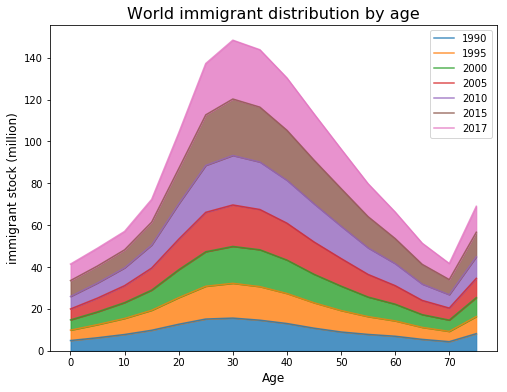

In [192]:
age_plot(distribution_age_clean)

### Top immigrant countries  

In [235]:
# find the top 10 countries has the highest immigrant stock, sort data by 2017
migrant_stock_top = migrant_stock.sort_values(2017, ascending = False).head(10).drop("Code", axis = 1)
migrant_stock_top

,1990,1995,2000,2005,2010,2015,2017
Country,,,,,,,
United States of America,23251.0260,28451.0530,34814.0530,39258.2930,44183.6430,48178.8770,49776.9700
Saudi Arabia,4998.4450,5122.7020,5263.3870,6501.8190,8429.9560,10771.3660,12185.2840
Germany,5936.1810,7464.4060,8992.6310,9402.4470,9812.2630,10220.4180,12165.0830
Russian Federation,11524.9480,11928.9270,11900.2970,11667.5880,11194.7100,11643.2760,11651.5090
United Kingdom,3650.2860,4155.2930,4730.1650,5926.1560,7604.5830,8411.0210,8841.7170
United Arab Emirates,1306.5740,1824.1180,2446.6750,3281.0360,7316.6110,7995.1260,8312.5240
France,5897.2670,6087.9930,6278.7180,6737.6000,7196.4810,7918.3820,7902.7830
Canada,4333.3180,4864.7780,5511.9140,6078.9850,6761.2260,7561.2260,7861.2260
Australia,3955.2130,4153.3300,4386.2500,4878.0300,5882.9800,6710.5400,7035.5600


In [236]:
#get the top country list for later use
top_country_list = list(migrant_stock_top.index)
top_country_list

['United States of America',
 'Saudi Arabia',
 'Germany',
 'Russian Federation',
 'United Kingdom',
 'United Arab Emirates',
 'France',
 'Canada',
 'Australia',
 'Spain']

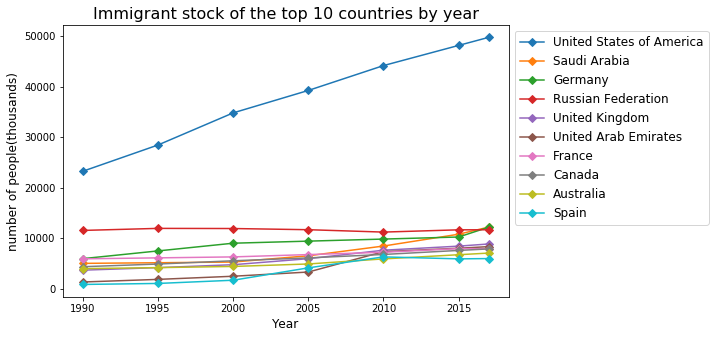

In [240]:
# plot line graph: total immigrant stock of top countries by year
plt.figure(figsize=(8, 5))

for i in top_country_list:
    # use diamond as marker
    plt.plot(migrant_stock_top.loc[i,:], marker="D")
# set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Immigrant stock of the top 10 countries by year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of people(thousands)", fontsize=12)
plt.savefig("migrant stock.png", bbox_inches='tight') #save the plots to folder 
plt.show()

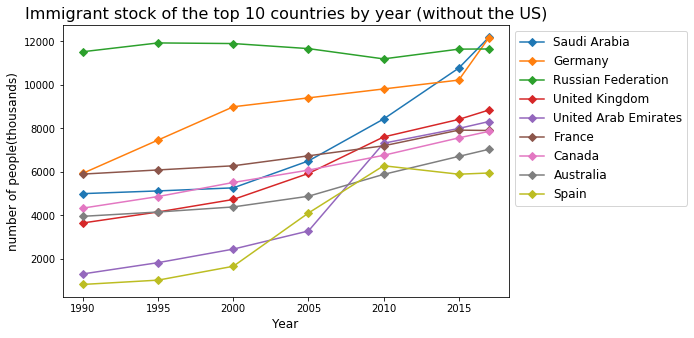

In [15]:
# plot line graph: total migrant stock of top countries by year without US
plt.figure(figsize=(8, 5))

for i in top_country_list:
    # if country name is USA do nothing, else draw the graph.
    if i == "United States of America":
        pass
    else:
    # use diamond as marker
      plt.plot(migrant_stock_top.loc[i,:], marker="D")
# set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Immigrant stock of the top 10 countries by year (without the US)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of people(thousands)", fontsize=12)
plt.savefig("migrant stock without us.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Percentage change of top immigration countries

In [237]:
# import the migrant percentage change by year dataset
migrant_change = pd.read_excel("migrant stock.xlsx", sheet_name="migrant_annual_change", header=1).reset_index()
migrant_change.replace("..", "0", inplace=True)
migrant_change = migrant_change.fillna("0")
migrant_change.rename(columns={"level_1": "Country"}, inplace=True)
migrant_change.set_index("Country", inplace=True)
migrant_change = migrant_change.iloc[:,4:10].loc[top_country_list].astype(dtype="float64")
migrant_change

,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2017
Country,,,,,,
United States of America,4.0367,4.0367,2.4028,2.3638,1.7313,1.6316
Saudi Arabia,0.4911,0.5419,4.2261,5.1942,4.9020,6.1669
Germany,4.5816,3.7252,0.8913,0.8533,0.8151,8.7091
Russian Federation,0.6890,-0.0481,-0.3950,-0.8275,0.7858,0.0353
United Kingdom,2.5915,2.5915,4.5083,4.9875,2.0158,2.4969
United Arab Emirates,6.6738,5.8727,5.8686,16.0398,1.7737,1.9466
France,0.6366,0.6169,1.4108,1.3178,1.9119,-0.0986
Canada,2.3138,2.4978,1.9585,2.1273,2.2366,1.9455
Australia,0.9775,1.0913,2.1253,3.7464,2.6323,2.3649


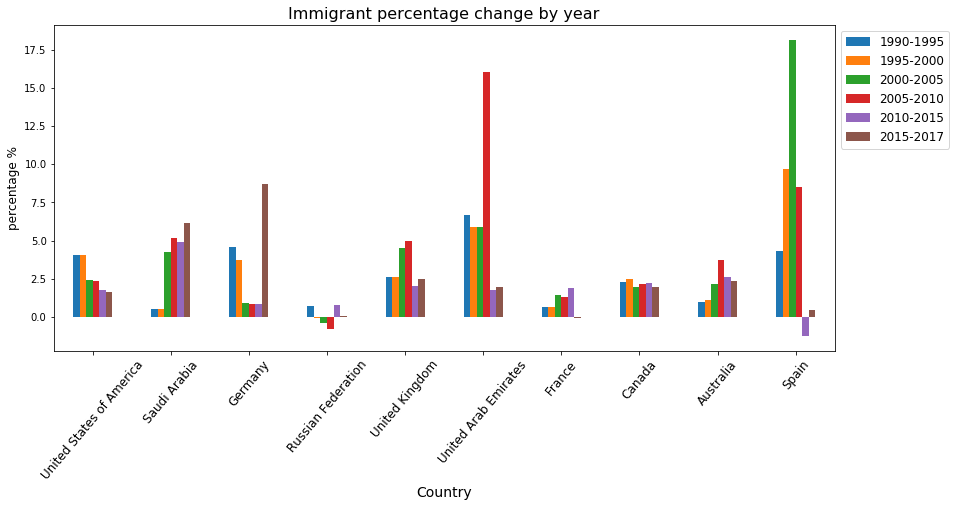

In [238]:
# plot bar chart by country show yearly growth 
M_change.plot(figsize=(14, 6), kind="bar")
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Immigrant percentage change by year", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("percentage %", fontsize=12)
plt.xticks(rotation=50, fontsize=12)
plt.savefig("migrant change.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### immigrant country of origin 

In [241]:
#import the immigrant by origin country dataset (the coloumns are the origin country of the immigrant)
migrant_origin = pd.read_excel("migrant stock.xlsx", sheet_name="immigrant_origin", header=1).reset_index()
#replace missing value by 0
migrant_origin.replace("..","0", inplace=True)
migrant_origin = migrant_origin.fillna("0")
#replace the column names and set "Year" as index
migrant_origin.rename(columns={"level_2": "Country", "level_0":"Year"}, inplace=True)
migrant_origin.set_index("Year","Country", inplace=True)
migrant_origin.head()

,level_1,Country,level_3,level_4,level_5,Total,Other North,Other South,Afghanistan,Albania,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990.0000,1990001.0000,WORLD,0,900.0000,0,152542373,2144536,6342531,6724681,179490,...,237258,1429956,5060,185888,1235348,6484,168239,455442,83210,176697
1990.0000,1990002.0000,More developed regions,b,901.0000,0,82391619,1094823,3412144,119338,177192,...,56562,1078599,1017,114635,1083015,884,333,11407,25922,40832
1990.0000,1990003.0000,Less developed regions,c,902.0000,0,70150754,1049713,2930387,6605343,2298,...,180696,351357,4043,71253,152333,5600,167906,444035,57288,135865
1990.0000,1990004.0000,Least developed countries,d,941.0000,0,11073226,250575,533018,0,0,...,286,2027,9,2510,71579,0,0,357,25400,47578
1990.0000,1990005.0000,"Less developed regions, excluding least develo...",0,934.0000,0,59077528,799138,2397369,6605343,2298,...,180410,349330,4034,68743,80754,5600,167906,443678,31888,88287


In [242]:
#define a function to plot the origin of the immigrant 
def immigrant_origin(country, year):
    df = migrant_origin[migrant_origin["Country"]==country]
    #drop not use columns
    df.drop(df.columns[0:8], axis=1, inplace=True)
    #transpose the dataset and change the datatype to integer
    df = df.T.astype(dtype="int")
    #sort the data by year's immigrant value descendingly
    df = df.sort_values(year, ascending=False) 
    df = df[year]
    #leave the top five origin country and all the other counted as "others"
    for i in range(len(df)):
        if i<5 :
             pass
        else:
            df.rename({df.index[i]: "others"}, inplace=True)

    df = df.groupby(df.index).sum()
    
    #plot the pie chart of the origin countries
    plt.figure(figsize=(8,8))
    plt.pie(df, labels=list(df.index), autopct= "%.1f%%", pctdistance=0.85, labeldistance=1.1, startangle=90)
    plt.title("Origin countries of immigrant in \n" + str(country) + " in year " + str(year), fontsize=14)
    #plt.savefig("migrant origin" + str(country) + str(year)+ ".png", bbox_inches='tight') 
    plt.show() 

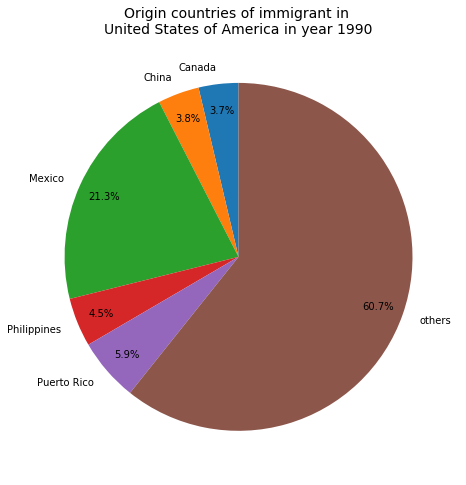

In [243]:
immigrant_origin("United States of America", 1990)
#plt.savefig("migrant origin United States of America.png", bbox_inches='tight') 

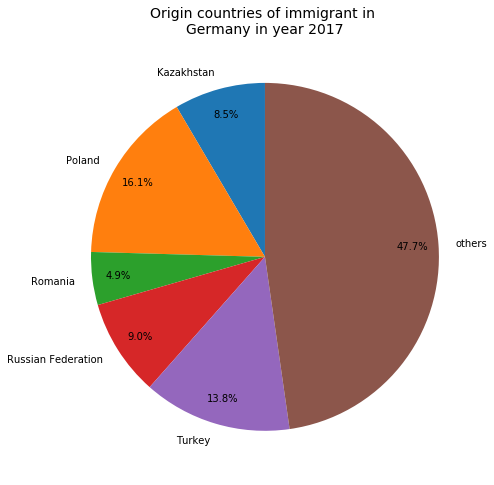

In [226]:
immigrant_origin("Germany", 2017)
#plt.savefig("migrant origin Germany.png", bbox_inches='tight') 

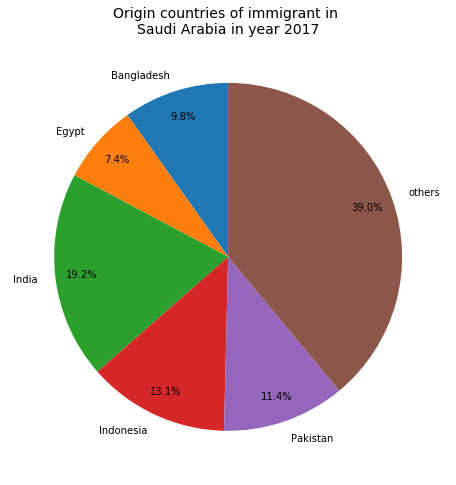

In [227]:
immigrant_origin("Saudi Arabia", 2017)
#plt.savefig("migrant origin saudi arabia.png", bbox_inches='tight') 

### Emmigrant 

In [19]:
#select each years world immigrant data
emmigrant = migrant_origin[migrant_origin["Country"]=="WORLD"]
emmigrant.drop(emmigrant.columns[0:8], axis = 1, inplace = True)
#transpose the dataframe, so the dataset become the emmigrant of each country by yearly
emmigrant = emmigrant.T.sort_values(2017, ascending = False).astype(dtype="float64").head(10)/1000
emmigrant 

C:\Users\cici\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0,2017.0
India,6718.8620,7233.7820,7978.3650,9649.6260,13321.3320,15860.0560,16587.7200
Mexico,4394.6840,6948.5580,9562.2780,10816.5440,12413.0850,12546.5370,12964.8820
Russian Federation,12664.5370,11611.8050,10734.9630,10385.0250,10213.3130,10354.8920,10635.9940
China,4229.8600,4945.3760,5786.9540,7242.3060,8648.8850,9675.2090,9962.0580
Bangladesh,5451.5460,5424.6300,5435.3720,5765.1580,6742.8450,7246.7260,7499.9190
Syrian Arab Republic,620.8680,661.4690,706.4990,861.7590,1079.7490,6238.4720,6864.4450
Pakistan,3341.5740,3343.5350,3398.4050,3896.4940,5006.7530,5922.3050,5978.6350
Ukraine,5549.4770,5606.0680,5596.4630,5567.4940,5458.6640,5842.5940,5941.6530
Philippines,2029.1900,2504.9180,3065.8830,3700.5910,4704.9190,5423.3230,5680.6820
United Kingdom,3795.6620,3715.4830,3866.8840,4140.6410,4461.7110,4726.2080,4921.3090


In [20]:
#set a country list of top emmigrant country
emmigrant_list = list(emmigrant.index)

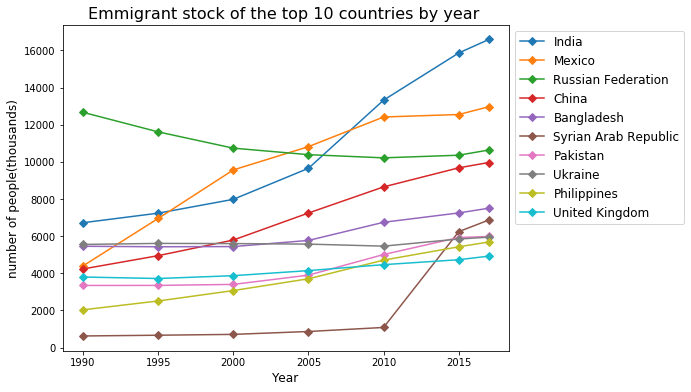

In [21]:
# plot line graph: total migrant stock of top countries by year
plt.figure(figsize=(8, 6))

for i in emmigrant_list:
    # use diamond as marker
    plt.plot(emmigrant.loc[i,:], marker="D")
# set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Emmigrant stock of the top 10 countries by year ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("number of people(thousands)", fontsize=12)
plt.savefig("migrant out.png", bbox_inches='tight') #save the plots to folder 
plt.show()

### Refugee analysis

In [246]:
# import the immigrant to population ratio dataset
M_pop_percent = pd.read_excel("migrant stock.xlsx", sheet_name="migrant_to_population", header=1).reset_index()
M_pop_percent.replace("..", "0", inplace=True)
M_pop_percent = M_pop_percent.fillna("0")
M_pop_percent.rename(columns={"level_1": "Country"}, inplace=True)
M_pop_percent.set_index("Country", inplace=True)
M_pop_percent=M_pop_percent.loc[top_country_list, year].astype(dtype="float64")
M_pop_percent

,1990,1995,2000,2005,2010,2015,2017
Country,,,,,,,
United States of America,9.2072,10.7096,12.3462,13.3021,14.3155,15.0592,15.3415
Saudi Arabia,30.6149,27.3417,25.3482,27.1978,30.7375,34.1329,36.9944
Germany,7.5029,9.1880,11.0356,11.5126,12.1297,12.5085,14.8148
Russian Federation,7.8101,8.0444,8.1288,8.1240,7.8201,8.0919,8.0919
United Kingdom,6.3835,7.1670,8.0239,9.8299,12.0123,12.8615,13.3598
United Arab Emirates,70.2393,74.4897,77.5510,71.6452,88.4644,87.3374,88.4297
France,10.3532,10.4530,10.5333,11.0031,11.4181,12.2847,12.1620
Canada,15.6479,16.5863,17.9332,18.8274,19.7878,21.0328,21.4646
Australia,23.2094,22.9761,23.0058,24.1022,26.5957,28.1961,28.7746


In [247]:
# import the refugee stock dataset
refugee = pd.read_excel("migrant stock.xlsx", sheet_name="refugee", header=1).reset_index()
refugee.replace("..", "0", inplace=True)
refugee.rename(columns={"level_1": "Country"}, inplace=True)
refugee.set_index("Country", inplace=True)
refugee = refugee[year].astype(dtype="float64")/1000
refugee.head()

,1990,1995,2000,2005,2010,2015,2017
Country,,,,,,,
Burundi,267.9290,173.0170,27.1360,20.6810,29.3650,47.8050,56.9970
Comoros,0.0000,0.0050,0.0100,0.0050,0.0000,0.0000,0.0000
Djibouti,54.5080,27.3100,23.2570,10.4560,15.1040,22.0060,25.7440
Eritrea,0.0000,1.0830,1.9840,4.4180,4.8090,2.8980,2.5980
Ethiopia,741.9650,393.4790,197.9590,100.8170,154.2950,739.1510,793.5950


In [248]:
#calculate the refugee-to immigrant ratio
R_immigrant = refugee.loc[top_country_list]/migrant_stock_top*100
R_immigrant

,1990,1995,2000,2005,2010,2015,2017
Country,,,,,,,
United States of America,1.8846,2.1908,1.4598,0.9663,0.5988,1.1610,1.6385
Saudi Arabia,0.6654,0.2571,0.1009,3.7021,0.0066,0.0015,0.0014
Germany,12.1669,16.9859,10.0749,7.4450,6.0564,7.2085,10.3314
Russian Federation,0.0000,0.0000,0.2207,0.0131,0.0440,2.7191,2.7172
United Kingdom,1.1888,2.1878,3.9375,5.1160,3.1317,1.8672,1.7148
United Arab Emirates,0.0331,0.0223,0.0230,0.0032,0.0074,0.0136,0.0152
France,3.1647,2.5500,2.0882,2.0381,2.7887,4.2456,4.4906
Canada,3.3521,3.1271,2.2706,2.4210,2.3003,2.0610,1.9824
Australia,2.4756,1.9040,1.6243,1.3678,0.4335,0.7154,0.8266


In [258]:
#define a bar-line chart to compare the refugee-to-immigration ratio and immigration-to-population ratio of the top immigrant countries
def bar_line_plot(year):
    plt.rcParams["figure.figsize"]=(10,8)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx() # set up the 2nd axis

    # plot the bar chart
    ax2.bar(M_pop_percent.index.tolist(), M_pop_percent[year],width=0.5, alpha=0.5, color="green")
    # plot the line chart
    ax1.plot(R_immigrant[year], color = "blue")
    # set the commom x-axis 
    ax1.tick_params(axis="x", rotation=80, labelsize=12)
    ax1.set_title("Ratio of refugee-to-immigrant and immigrant-to-population in " + str(year), fontsize=16)
    # set the line y-axis
    ax1.set_ylabel("refugee-to-immigrant % (line)", fontsize=12)
    # set the bar y-axis
    ax2.set_ylabel("immigrant-to-population % (bar)", fontsize=12)
    #plt.savefig("refugee-immigration-percentage"+str(year)+".png", bbox_inches='tight') 
    plt.show()

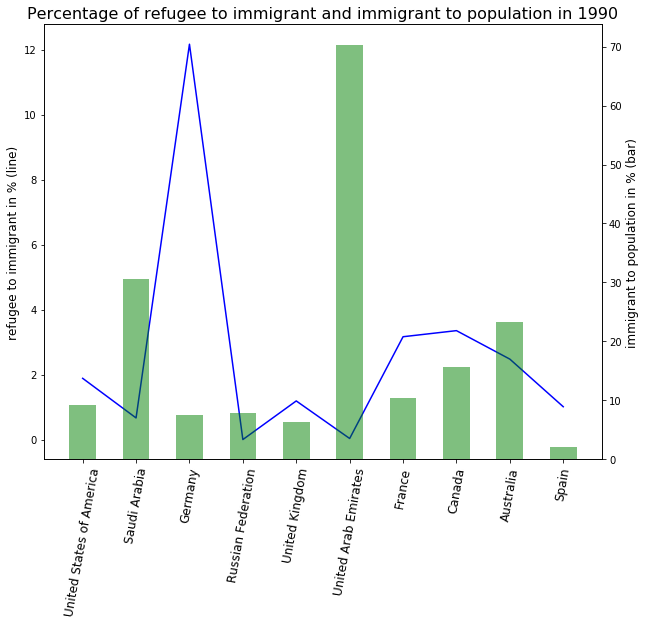

In [259]:
bar_line_plot(1990)

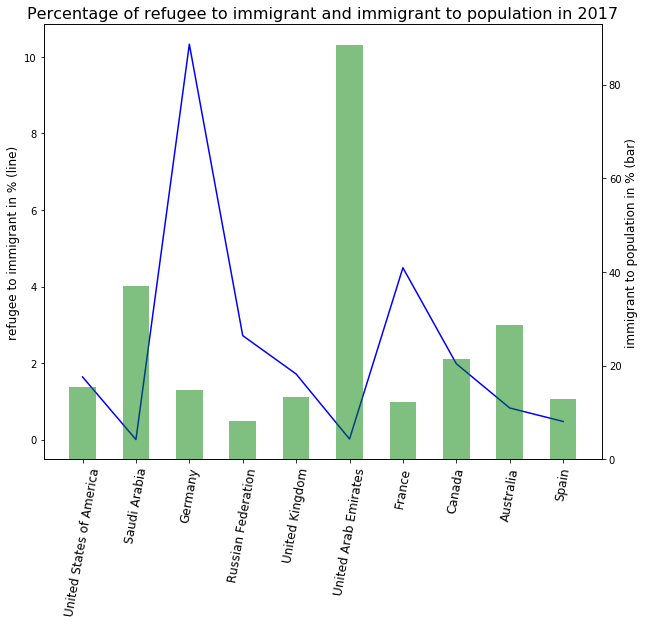

In [260]:
bar_line_plot(2017)

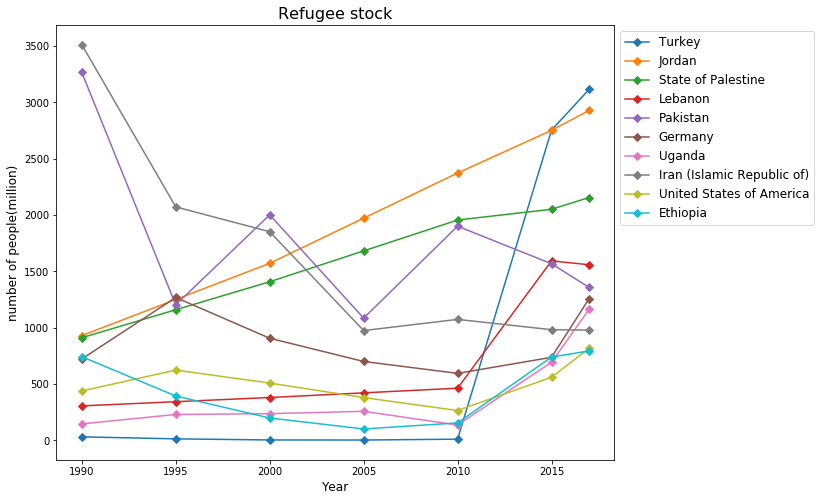

In [272]:
# plot line graph: top countries with refugee stock by year
refugee_top = refugee.sort_values(2017, ascending = False)
refugee_top = refugee_top.iloc[:,0:7].head(10)
refugee_top.T.plot(figsize=(10,8), marker="D")
# set legend location and fontsize
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)
plt.title("Refugee stock", fontsize=16)
plt.xlabel("Year", fontsize=12) 
plt.ylabel("number of people(million)", fontsize=12)
plt.savefig("refugee stock.png", bbox_inches="tight") #save the plots to folder 
plt.show()

In [264]:
refugee_clean = add_country_code(refugee)
refugee_clean.head()

,1990,1995,2000,2005,2010,2015,2017,Code
Country,,,,,,,,
Burundi,267.9290,173.0170,27.1360,20.6810,29.3650,47.8050,56.9970,BDI
Comoros,0.0000,0.0050,0.0100,0.0050,0.0000,0.0000,0.0000,COM
Djibouti,54.5080,27.3100,23.2570,10.4560,15.1040,22.0060,25.7440,DJI
Eritrea,0.0000,1.0830,1.9840,4.4180,4.8090,2.8980,2.5980,ERI
Ethiopia,741.9650,393.4790,197.9590,100.8170,154.2950,739.1510,793.5950,ETH


In [265]:
mapper(2017,refugee)

C:\Users\cici\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### correlation and prediction 

In [266]:
# Return ms and gdp to contiguous flattened array order by row-major 
immigrant_list = np.ravel(Migrant_stock.iloc[:,:-2], order="Country")
refugee_list = np.ravel(refugee.iloc[:,:-2], order="Country")
# conduct new dataframe
immigrant_refugee_relation = pd.DataFrame({"immigrant":immigrant_list,"refugee":refugee_list})
immigrant_refugee_relation.tail(20)


,immigrant,refugee
1372,0.4290,0.0000
1373,0.4870,0.0000
1374,2.9110,0.0000
1375,3.2740,0.0000
1376,3.6840,0.0000
1377,4.3010,0.0000
1378,4.5890,0.0000
1379,4.8770,0.0000
1380,0.3180,0.0000
1381,0.2630,0.0000


C:\Users\cici\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in log

C:\Users\cici\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in log



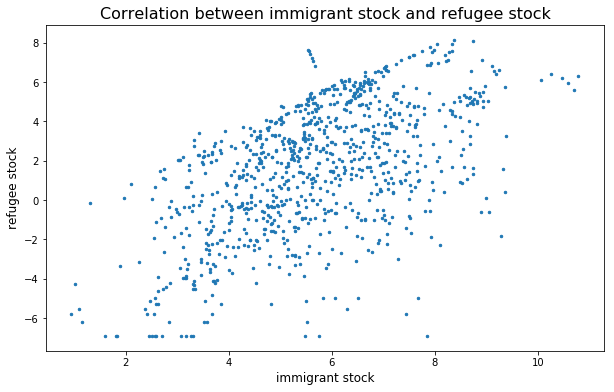

In [269]:
# plot scatter to show the correlation between military spending and GDP
plt.figure(figsize = (10,6))
#to make the graph looks nicer we use log number
x2 = np.log(immigrant_refugee_relation["immigrant"],dtype="float64") 
y2 = np.log(immigrant_refugee_relation["refugee"],dtype="float64")
#set the point size to 6
plt.scatter(x2,y2, s=6)
plt.title("Correlation between immigrant stock and refugee stock", fontsize=16)
plt.xlabel("immigrant stock", fontsize=12)
plt.ylabel("refugee stock", fontsize=12)
plt.savefig("correlation.png") #save the plots to folder 
plt.show()